## Introduction

Implement the Value Iteration algorithm to compute an optimal policy for three different (but related) Markov Decision Processes.The pseudo-code for the algorithm is reproduced below from the textbook (Reinforcement Learning, Sutton & Barto, 1998). 

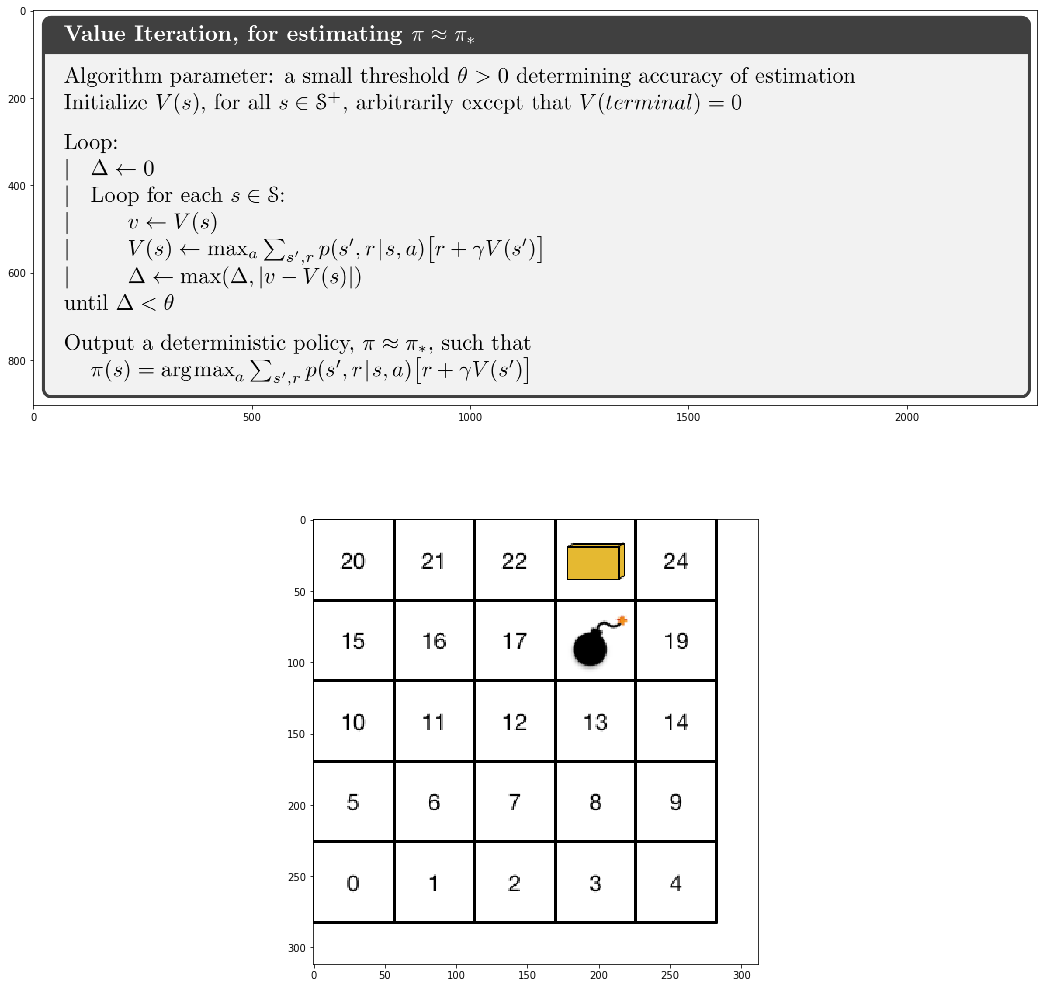

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(18,18))
pil_im = Image.open('images/bombs and gold numbers.png') 
pil = Image.open('images/value_iteration.png') 
im_array = np.asarray(pil_im)
i2_array = np.asarray(pil)

ax1.imshow(i2_array)
ax2.imshow(im_array)

The grid squares in the figure are numbered as shown. In all three problems, the following is true: 

**Actions available:** The agent has four possible actions in each grid square. These are _west_, _north_, _south_, and _east_. If the direction of movement is blocked by a wall (for example, if the agent executes action south at grid square 1), the agent remains in the same grid square. 

**Collecting gold:** On its first arrival at a grid square that contains gold, the agent collects the gold. In order to collect the gold, the agent needs to transition into the grid square (containing the gold) from a different grid square. 

**Hitting the bomb:** On arrival at a grid square that contains the bomb, the agent activates the bomb. 

** Terminal states:** The game terminates when all gold is collected or when the bomb is activated. In Exercises 1 and 2, you can define terminal states to be grid squares 18 and 23. In Exercise 3, you will need to define terminal state(s) differently.

# The environment: Navigation in a gridworld

The agent has four possible actions in each state (grid square): west, north, south, and east. The actions are unreliable. They move the agent in the intended direction with probability 0.8, and with probability 0.2, they move the agent in a random other direction. If the direction of movement is blocked, the agent remains in the same grid square. The initial state of the agent is one of the five grid squares at the bottom, selected randomly. The grid squares with the gold and the bomb are **terminal states**. If the agent finds itself in one of these squares, the episode ends. Then a new episode begins with the agent at the initial state.

## Deterministic environment

Compute the optimal policy using Value Iteration. 

The array `policy` is a numpy array of strings that specifies an optimal action at each grid location. Use the abbreviations "n", "e", "s", and "w" for the four actions. As an example, policy at index 0 needs to give "n", if _north_ is an optimal action in cell 0. The policy for a terminal state can be any value (direction). If there are multiple optimal actions from a state, any optimal action will be considered as a correct answer. 

The array `v` should be an array of floats that contains the expected return at each grid square (that is, the state value).

In [1]:
import numpy as np

class Gridworld:
    def __init__(self):
        self.num_rows = 5
        self.num_cols = 5
        self.num_cells = self.num_cols * self.num_rows
        
        # Specify available actions
        self.actions = ["n", "e", "s", "w"]
        #self.epsilon = 0
        
        self.num_actions = len (self.actions)
        
        # Choose position of the gold and bomb
        self.bomb_positions = np.array([18])
        self.gold_positions = np.array([23])
        self.terminal_states = np.array([self.bomb_positions, self.gold_positions])
       
        # Specify rewards
        self.rewards = np.zeros(self.num_cells)
        self.rewards[self.bomb_positions] = -10
        self.rewards[self.gold_positions] = 10
        
        self.grid = np.zeros(25)
        
    def get_available_actions(self):
        return self.actions  
    
    def make_step(self, action_index): 

        new_position = action_index
        position_list = []
    
        for action in self.actions:
                
# if candidate position come out of the grid, nest state is keep stay in current position
            if action == "n":    # "north"
                candidate_position = action_index + 5
                if candidate_position < 25: #judge if next action touch north wall
                    new_position = candidate_position
                else:
                    new_position = action_index


            elif action == "e":   # east
                candidate_position = action_index + 1
                if action_index % 5 == 4:  # The %-operator denotes "modulo"-division,judge if next action touch east wall
                    new_position = action_index
       
                else:
                    new_position = candidate_position


            elif action == "s":   # south
                candidate_position = action_index - 5
                if candidate_position >= 0:#judge if next action touch south wall
                    new_position = candidate_position

                else:
                    new_position = action_index

            elif action == "w":  # west
                candidate_position = action_index - 1
                if action_index % 5 == 0:#judge if next action touch west wall
                    new_position = action_index           
                else:
                    new_position = candidate_position      
                
            position_list.append(new_position)                
            
        return position_list

In [2]:
def step_reward():
    
 # Choose position of the gold and bomb
    bomb_positions = np.array([18])
    gold_positions = np.array([23])

    # Specify rewards
    rewards = np.zeros(env.num_cells)
    
    rewards[np.asscalar(bomb_positions)] = -10
    rewards[np.asscalar(gold_positions)] = 10
    
    return rewards


In [3]:
# change direction index into actions
def direct_policy(pol):
    policys =[]
    for i in range (25):
        x = pol[i]

        policys.append(env.actions[int(x)])
    policy = np.asarray(policys)
    return policy

In [4]:
class Agent:

    def __init__(self, env):
        self.V = np.zeros(25)
    
    def next_best_action(self,s, V):
        action_values = []
        for next_state in env.make_step(s):

            action_values.append(rewards[next_state]-1 + V[next_state])

        return np.argmax(action_values), np.max(action_values)
    
    def optimize(self):
        THETA = 1e-10
        delta = float("inf")
        round_num = 0
        policy_index = np.zeros(25)
        while delta > THETA:
            delta = 0

            print("\nValue Iteration: Round " + str(round_num))

            for s in range(25):
                # stop calculate at the terminate position
                if s != env.bomb_positions and s != env.gold_positions:
        
                    best_action, best_action_value = self.next_best_action(s, self.V)
            
                    #delta equal to new state value minus old state value
                    delta = max(delta, np.abs(best_action_value - self.V[s]))
                    self.V[s] = best_action_value

                    policy_index[s] = best_action
                               
            round_num += 1
        return policy_index

In [5]:
env = Gridworld()
rewards = step_reward()
agent = Agent(env)

In [6]:
policy_index = agent.optimize()


Value Iteration: Round 0

Value Iteration: Round 1

Value Iteration: Round 2

Value Iteration: Round 3

Value Iteration: Round 4

Value Iteration: Round 5

Value Iteration: Round 6

Value Iteration: Round 7


In [7]:
v = agent.V
v

array([3., 4., 5., 4., 5., 4., 5., 6., 5., 6., 5., 6., 7., 6., 7., 6., 7.,
       8., 0., 8., 7., 8., 9., 0., 9.])

In [8]:
policy = direct_policy(policy_index)
policy

array(['n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
       'e', 'n', 'n', 'n', 'n', 'n', 'n', 'e', 'e', 'e', 'n', 'w'],
      dtype='<U1')

#### Check the data types

In [10]:
# Print the values you computed
print("This is your 'policy':")
print(policy)
print("These are your state values 'v':")
print(v)

# Check whether both policy and v are numpy arrays.
import numpy as np
assert(isinstance(policy, np.ndarray))
assert(isinstance(v, np.ndarray))

# Check correct shapes of numpy arrays.
assert(policy.shape == (25, ))
assert(v.shape == (25, ))

# Check whether the numpy arrays have the correct data types.
assert(np.issubdtype(policy.dtype, np.unicode_)) # policy.dtype should be '<U1'
assert(np.issubdtype(v.dtype, np.float64))

# Check whether all policy values are either "n", "w", "s", or "e".
assert(np.all(np.isin(policy, np.array(["n", "w", "s", "e"])))) 

# Arrays with CORRECT data types (but WRONG values!) would be, for example:
# policy = np.array(["n", "w", "s", "w", "e", "n", "w", "s", "w", "e", 
#                    "n", "w", "s", "w", "e", "n", "w", "s", "w", "e", 
#                    "n", "w", "s", "w", "e"])
# v = np.random.rand(25)

This is your 'policy':
['n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'e' 'n' 'n' 'n' 'n'
 'n' 'n' 'e' 'e' 'e' 'n' 'w']
These are your state values 'v':
[3. 4. 5. 4. 5. 4. 5. 6. 5. 6. 5. 6. 7. 6. 7. 6. 7. 8. 0. 8. 7. 8. 9. 0.
 9.]


## Stochastic environment

With probability 0.8, it moves in the intended direction. With probability 0.2, it moves in a random direction. For example, from grid square 0, if the agent executes action _north_, with probability 0.8, the action will work as intended. But with probability 0.2, the agent's motor control system will move in a random direction (including north). For example, with probability 0.05, it will try to move west (where it will be blocked by the wall and hence remain in grid square 0). Notice that the total probability of moving to square 5 (as intended) is 0.8 + 0.05 = 0.85.
 
Compute the optimal policy using Value Iteration.

In [13]:
rewards

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0., -10.,   0.,   0.,   0.,
         0.,  10.,   0.])

In [14]:
class c:

    def __init__(self, env):
        self.V = np.zeros(25)
    
    def next_best_action(self,s, V):
        direction_values = 0
        action_values = []
#find tha best state value and policy
        for next_state in env.make_step(s):
            action_values.append(rewards[next_state]-1 + V[next_state])# every action probability equal to 1
        
        max_direction=np.argmax(action_values) #get the best state value index
        max_value=np.max(action_values)

# assignment to the best state value with 0.85 probability, the other 3 direction with 0.05 probability
        for i in action_values:
            if i==max_value:               
                direction_values = direction_values+0.85*i
                max_value = 100
            else:
                direction_values = direction_values+0.05 *i
        return np.argmax(action_values), direction_values
    
    def optimize(self):
        THETA = 1e-10
        delta = float("inf")
        round_num = 0
        policy_index = np.zeros(25)

        while delta > THETA:
            delta = 0

            print("\nValue Iteration: Round------------------------------------------- " + str(round_num))

            for s in range(25):
                if s != env.bomb_positions and s != env.gold_positions:

                    best_action, best_action_value = self.next_best_action(s, self.V)

                    delta = max(delta, np.abs(best_action_value - self.V[s]))
                    self.V[s] = best_action_value

                    policy_index[s] = best_action
                                
            round_num += 1

        return policy_index

In [15]:
agent1111 = c(env)
policy_index = agent1111.optimize()


Value Iteration: Round------------------------------------------- 0

Value Iteration: Round------------------------------------------- 1

Value Iteration: Round------------------------------------------- 2

Value Iteration: Round------------------------------------------- 3

Value Iteration: Round------------------------------------------- 4

Value Iteration: Round------------------------------------------- 5

Value Iteration: Round------------------------------------------- 6

Value Iteration: Round------------------------------------------- 7

Value Iteration: Round------------------------------------------- 8

Value Iteration: Round------------------------------------------- 9

Value Iteration: Round------------------------------------------- 10

Value Iteration: Round------------------------------------------- 11

Value Iteration: Round------------------------------------------- 12

Value Iteration: Round------------------------------------------- 13

Value Iteration: Round-------

In [16]:
ori_V = agent1111.V
print(ori_V)

policy_index = agent1111.optimize()
print(policy_index)

z = direct_policy(policy_index)
print(z)

[1.35979208 2.19733672 2.42878751 1.57272161 2.55202451 2.48699534
 3.40945989 3.66922967 2.64122933 3.78610115 3.67550938 4.69621388
 4.99441863 3.2189158  5.10250988 4.86185111 5.99087587 6.37082431
 0.         6.46721593 6.04169329 7.28756636 8.61359951 0.
 8.69262311]

Value Iteration: Round------------------------------------------- 0
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 3.]
['n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'e' 'n' 'n' 'n' 'n' 'e' 'n' 'n' 'n' 'n'
 'n' 'n' 'e' 'e' 'e' 'n' 'w']


In [39]:
print("This is your 'policy':")
print(z)
print("These are your state values 'v':")
print(ori_V)

# Check whether both policy and v are numpy arrays.
import numpy as np
assert(isinstance(z, np.ndarray))
assert(isinstance(ori_V, np.ndarray))

# Check correct shapes of numpy arrays.
assert(z.shape == (25, ))
assert(ori_V.shape == (25, ))

# Check whether the numpy arrays have the correct data types.
assert(np.issubdtype(z.dtype, np.unicode_)) # policy.dtype should be '<U1'
assert(np.issubdtype(ori_V.dtype, np.float64))

# Check whether all policy values are either "n", "w", "s", or "e".
assert(np.all(np.isin(z, np.array(["n", "w", "s", "e"])))) 

This is your 'policy':
['n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'e' 'n' 'n' 'n' 'n' 'e' 'n' 'n' 'n' 'n'
 'n' 'n' 'e' 'e' 'e' 'n' 'w']
These are your state values 'v':
[1.35979208 2.19733672 2.42878751 1.57272161 2.55202451 2.48699534
 3.40945989 3.66922967 2.64122933 3.78610115 3.67550938 4.69621388
 4.99441863 3.2189158  5.10250988 4.86185111 5.99087587 6.37082431
 0.         6.46721593 6.04169329 7.28756636 8.61359951 0.
 8.69262311]


## Stochastic environment with two pieces of gold 

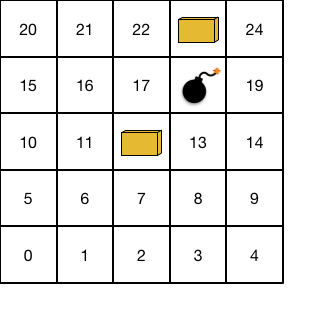

In [2]:
Image(filename='images/bomb and two gold.png') 

There is an additional piece of gold on grid square 12. Recall from earlier instructions that the terminal state is reached only when _all_ gold is collected or when the bomb is activated.

Compute the optimal policy using Value Iteration. 

Output two one-dimensional numpy arrays with names `policy` and `v`, as in Exercises 1 and 2. These arrays should specify the expected return and an optimal policy at the corresponding grid sqaure **before any gold is collected or a bomb is activated.** 

In [20]:
#create a new grid, which is only have one gold at the position of 12
class gold_Gridworld:
    def __init__(self):
        self.num_rows = 5
        self.num_cols = 5
        self.num_cells = self.num_cols * self.num_rows
        
        # Specify available actions
        self.actions = ["n", "e", "s", "w"]
        #self.epsilon = 0
        
        self.num_actions = len (self.actions)
        
        # Choose position of the gold and bomb
        self.bomb_positions = np.array([18])
        self.gold_positions = np.array([12]) 
        self.terminal_states = np.array([self.bomb_positions, self.gold_positions])
        
    def get_available_actions(self):
        return self.actions  
    
    def make_step(self, action_index): 
        new_position = action_index
        position_list = []
#         print('new_position',new_position)
    
        for action in self.actions:

            if action == "n":    # "north"
                candidate_position = action_index + 5
                if candidate_position < 25:
                    new_position = candidate_position
                else:
                    new_position = action_index

            elif action == "e":   # east
                candidate_position = action_index + 1
                if action_index % 5 == 4:  # The %-operator denotes "modulo"-division.
                    new_position = action_index
       
                else:
                    new_position = candidate_position

            elif action == "s":   # south
                candidate_position = action_index - 5
                if candidate_position >= 0:
                    new_position = candidate_position

                else:
                    new_position = action_index

            elif action == "w":  # west
                candidate_position = action_index - 1
                if action_index % 5 == 0:
                    new_position = action_index
             
                else:
                    new_position = candidate_position      
                
            position_list.append(new_position)
                
            
        return position_list

In [21]:
# create new rewards
def gold_reward():
    
 # Choose position of the gold and bomb
    bomb_positions = np.array([18])
    gold_positions = np.array([12])

    # Specify rewards
    rewards = np.zeros(env.num_cells)
    
    rewards[np.asscalar(bomb_positions)] = -10
    rewards[np.asscalar(gold_positions)] = 10
    
    return rewards

In [22]:
bonus = gold_reward()
bonus

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,  10.,   0.,   0.,   0.,   0.,   0., -10.,   0.,   0.,   0.,
         0.,   0.,   0.])

In [23]:
class b:

    def __init__(self, env):
        self.V = np.zeros(25)
    
    def next_best_action(self, s, V):
        direction_values = 0
        action_values = []

        for next_state in env.make_step(s):
            action_values.append(bonus[next_state]-1 + V[next_state])
        
        max_direction=np.argmax(action_values) 
        max_value=np.max(action_values)

        for i in action_values:
            if i==max_value:               
                direction_values = direction_values+0.85*i
                max_value = 100
            else:
                direction_values = direction_values+0.05 *i

        return np.argmax(action_values), direction_values
    
    def optimize(self):
        THETA = 1e-10
        delta = float("inf")
        round_num = 0
        policy_index = np.zeros(25)

        while delta > THETA:
            delta = 0

            print("\nValue Iteration: Round------------------------------------------- " + str(round_num))

            for s in range(25):
                if s != env.bomb_positions and s != env.gold_positions:

                    best_action, best_action_value = self.next_best_action(s, self.V)

                    delta = max(delta, np.abs(best_action_value - self.V[s]))
                    self.V[s] = best_action_value
                    
                    policy_index[s] = best_action
               
            round_num += 1

        return policy_index

In [24]:
env = gold_Gridworld()

In [25]:
gold1 = b(env)
gold_policy = gold1.optimize()


Value Iteration: Round------------------------------------------- 0

Value Iteration: Round------------------------------------------- 1

Value Iteration: Round------------------------------------------- 2

Value Iteration: Round------------------------------------------- 3

Value Iteration: Round------------------------------------------- 4

Value Iteration: Round------------------------------------------- 5

Value Iteration: Round------------------------------------------- 6

Value Iteration: Round------------------------------------------- 7

Value Iteration: Round------------------------------------------- 8

Value Iteration: Round------------------------------------------- 9

Value Iteration: Round------------------------------------------- 10

Value Iteration: Round------------------------------------------- 11

Value Iteration: Round------------------------------------------- 12

Value Iteration: Round------------------------------------------- 13

Value Iteration: Round-------

In [26]:
v_gold = gold1.V
v_gold

array([5.06767808, 6.1787892 , 7.28739724, 6.12844981, 5.01464931,
       6.1787892 , 7.35540702, 8.59725345, 7.3022647 , 6.08004088,
       7.28739724, 8.59725345, 0.        , 7.68349462, 6.36762762,
       6.12844981, 7.3022647 , 7.68349462, 0.        , 4.28547547,
       5.01464931, 6.08004088, 6.36762762, 4.28547547, 3.17436436])

In [27]:
gold_policy

array([0., 0., 0., 0., 3., 1., 0., 0., 3., 3., 1., 1., 0., 3., 3., 1., 2.,
       2., 0., 2., 2., 2., 2., 3., 3.])

In [28]:
gold_direct = direct_policy(gold_policy)
gold_direct

array(['n', 'n', 'n', 'n', 'w', 'e', 'n', 'n', 'w', 'w', 'e', 'e', 'n',
       'w', 'w', 'e', 's', 's', 'n', 's', 's', 's', 's', 'w', 'w'],
      dtype='<U1')

# bomb Grid

In [29]:
V23 = v_gold[23]
V23

4.2854754704713915

In [46]:
v_gold

array([5.06767808, 6.1787892 , 7.28739724, 6.12844981, 5.01464931,
       6.1787892 , 7.35540702, 8.59725345, 7.3022647 , 6.08004088,
       7.28739724, 8.59725345, 0.        , 7.68349462, 6.36762762,
       6.12844981, 7.3022647 , 7.68349462, 0.        , 4.28547547,
       5.01464931, 6.08004088, 6.36762762, 4.28547547, 3.17436436])

In [30]:
V12 = ori_V[12]
V12

4.994418628980882

In [31]:
# create a new bomb grid with no gold and bomb at the same position
class bomb_Gridworld:
    def __init__(self):
        self.num_rows = 5
        self.num_cols = 5
        self.num_cells = self.num_cols * self.num_rows
        
        # Specify available actions
        self.actions = ["n", "e", "s", "w"]        
        self.num_actions = len (self.actions)
        
        # Choose position of the bomb
        self.bomb_positions = np.array([18])

        self.terminal_states = np.array([self.bomb_positions])
 
    def get_available_actions(self):
        return self.actions  
    
    def make_step(self, action_index): 

        new_position = action_index
        position_list = []
#         print('new_position',new_position)
    
        for action in self.actions:

            if action == "n":    # "north"
                candidate_position = action_index + 5
                if candidate_position < 25:
                    new_position = candidate_position
                else:
                    new_position = action_index


            elif action == "e":   # east
                candidate_position = action_index + 1
                if action_index % 5 == 4:  # The %-operator denotes "modulo"-division.
                    new_position = action_index
       
                else:
                    new_position = candidate_position

            elif action == "s":   # south
                candidate_position = action_index - 5
                if candidate_position >= 0:
                    new_position = candidate_position

                else:
                    new_position = action_index

#                 print('s',new_position)

            elif action == "w":  # west
                candidate_position = action_index - 1
                if action_index % 5 == 0:
                    new_position = action_index
             
                else:
                    new_position = candidate_position      

            position_list.append(new_position)
                
            
        return position_list

In [32]:
#define bomb reward, which is go to the bomb position obtain -10 point, and go to gold positon obtain 10 point
def bomb_reward():    
 # Choose position of the gold and bomb
    bomb_positions = np.array([18])
    gold_positions_12 = np.array([12])
    gold_positions_23 = np.array([23])
    

    # Specify rewards
    rewards = np.zeros(env.num_cells)
   
    rewards[np.asscalar(bomb_positions)] = -10
    rewards[np.asscalar(gold_positions_12)] = 10
    rewards[np.asscalar(gold_positions_23)] = 10
    
    return rewards

In [33]:
#defind bomb class to update state value
#under the bomb grid condition, it remains same value at the gold position, which is seperate calculated 
#by the exercise 2 and gold grid condition. 
#obtain the state value and policy of the 23rd grid when gold is at 12 position
# obtain the state value and policy of the 12th grid from exercise 2

class bomb:

    def __init__(self, env):
        self.V = np.zeros(25)
        self.V[12] = 4.994418628980882
        self.V[23] = 4.2854754704713915
    
    def next_best_action(self, s, V):
        direction_values = 0
        action_values = []

        for next_state in env.make_step(s):
            action_values.append(bomb_bonus[next_state]-1 + V[next_state])
        
        max_direction=np.argmax(action_values) 
        max_value=np.max(action_values)

        for i in action_values:
            if i==max_value:               
                direction_values = direction_values+0.85*i
                max_value = 100
            else:
                direction_values = direction_values+0.05 *i

        return np.argmax(action_values), direction_values
    
    def optimize(self):
        THETA = 1e-10
        delta = float("inf")
        round_num = 0
        policy_index = np.zeros(25)

        while delta > THETA:
            delta = 0
            print("\nValue Iteration: Round------------------------------------------- " + str(round_num))

            for s in range(25):
                if s != env.bomb_positions and s!= 12and s!=23:

                    best_action, best_action_value = self.next_best_action(s, self.V)

                    delta = max(delta, np.abs(best_action_value - self.V[s]))
                    self.V[s] = best_action_value
                    
                    policy_index[s] = best_action                    
#obtain the state value and policy of the 23rd grid when gold is at 12 position
#obtain the state value and policy of the 12th grid from exercise 2
#this two position remain the same value and policy
                if s==12 or s==23:
                    self.V[12] = 4.994418628980882
                    self.V[23] = 4.2854754704713915
                    
                    policy_index[12] = 0.0
                    policy_index[23] = 3.0
                           
            round_num += 1

        return policy_index

In [34]:
env = bomb_Gridworld()
bomb_bonus = bomb_reward()
bomb_bonus

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,  10.,   0.,   0.,   0.,   0.,   0., -10.,   0.,   0.,   0.,
         0.,  10.,   0.])

In [35]:
bomb1 = bomb(env)
bomb_policy = bomb1.optimize()

v_bomb = bomb1.V
v_bomb


Value Iteration: Round------------------------------------------- 0

Value Iteration: Round------------------------------------------- 1

Value Iteration: Round------------------------------------------- 2

Value Iteration: Round------------------------------------------- 3

Value Iteration: Round------------------------------------------- 4

Value Iteration: Round------------------------------------------- 5

Value Iteration: Round------------------------------------------- 6

Value Iteration: Round------------------------------------------- 7

Value Iteration: Round------------------------------------------- 8

Value Iteration: Round------------------------------------------- 9

Value Iteration: Round------------------------------------------- 10

Value Iteration: Round------------------------------------------- 11

Value Iteration: Round------------------------------------------- 12

Value Iteration: Round------------------------------------------- 13

Value Iteration: Round-------

array([10.06409806, 11.17488271, 12.28045984, 11.10816476,  9.99389366,
       11.17522837, 12.35165962, 13.59092292, 12.28122217, 11.051285  ,
       12.28702748, 13.59365638,  4.99441863, 12.41930416, 11.19974428,
       11.1861353 , 12.32932372, 12.5121464 ,  0.        , 10.61568556,
       10.65103994, 11.79603433, 13.00848756,  4.28547547, 12.97048714])

In [36]:
bomb_policy

array([0., 0., 0., 0., 3., 1., 0., 0., 3., 3., 1., 1., 0., 3., 3., 1., 2.,
       2., 0., 0., 1., 1., 1., 3., 3.])

In [41]:
bomb_direct = direct_policy(bomb_policy)
bomb_direct

array(['n', 'n', 'n', 'n', 'w', 'e', 'n', 'n', 'w', 'w', 'e', 'e', 'n',
       'w', 'w', 'e', 's', 's', 'n', 'n', 'e', 'e', 'e', 'w', 'w'],
      dtype='<U1')

In [45]:
# Print the values you computed
print("This is your 'policy':")
print(bomb_policy)
print("These are your state values 'v':")
print(v_bomb)

# Check whether both policy and v are numpy arrays.
import numpy as np
assert(isinstance(bomb_policy, np.ndarray))
assert(isinstance(v_bomb, np.ndarray))

# Check correct shapes of numpy arrays.
assert(bomb_policy.shape == (25, ))
assert(v_bomb.shape == (25, ))

# Check whether the numpy arrays have the correct data types.
assert(np.issubdtype(bomb_policy.dtype, np.unicode_)) # policy.dtype should be '<U1'
assert(np.issubdtype(v_bomb.dtype, np.float64))

# Check whether all policy values are either "n", "w", "s", or "e".
assert(np.all(np.isin(bomb_policy, np.array(["n", "w", "s", "e"])))) 

This is your 'policy':
[0. 0. 0. 0. 3. 1. 0. 0. 3. 3. 1. 1. 0. 3. 3. 1. 2. 2. 0. 0. 1. 1. 1. 3.
 3.]
These are your state values 'v':
[10.06409806 11.17488271 12.28045984 11.10816476  9.99389366 11.17522837
 12.35165962 13.59092292 12.28122217 11.051285   12.28702748 13.59365638
  4.99441863 12.41930416 11.19974428 11.1861353  12.32932372 12.5121464
  0.         10.61568556 10.65103994 11.79603433 13.00848756  4.28547547
 12.97048714]
